# Second Demo 

## How to Deal with regression errors 

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) #+ [3,0,0,0]
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
#1.0
print(reg.coef_)
#array([1., 2.])
print(reg.intercept_)
#3.0...
reg.predict(np.array([[3, 5]]))
#array([16.])

1.0
[1. 2.]
1.7763568394002505e-15


array([13.])

In [2]:
y

array([3, 5, 6, 8])

In [3]:
np.dot(X, np.array([1, 2]))

array([3, 5, 6, 8])

In [4]:
np.dot(X, np.array([1, 2])) + 3

array([ 6,  8,  9, 11])

# Another Example

[[ 9]
 [14]
 [19]
 [14]]
1.0


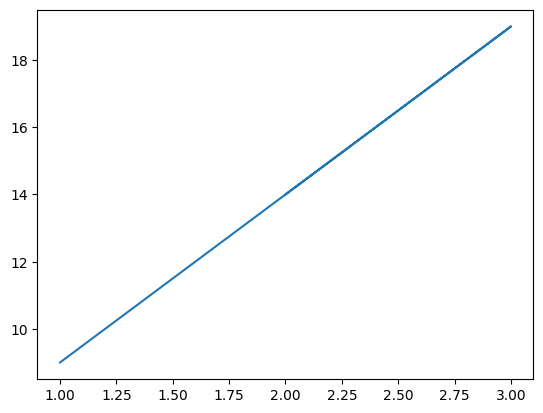

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 

X = np.array([[1],[2],[3],[2]])
y = np.dot(X , 5) + 4
print(y)
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
plt.plot(X,y)
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
import numpy as np
X = np.array([[1],[2],[3],[2]])
y = np.array([[1],[2],[3],[4]])
print(mean_squared_error(X,y))


1.0


In [7]:
import sklearn.metrics
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
sklearn.metrics.mean_squared_error(y_true, y_pred)
# 0.375
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
mean_squared_error(y_true, y_pred)
#0.7083...

0.7083333333333334

# Another Try 

In [8]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
def finding_last_big_change(ticker_series):
    #leumi_regression_data.reset_index(inplace=False)
    indexing = pd.RangeIndex(start=0,stop=len(ticker_series) ,step=1)
    ticker_series["numbers"] = indexing
    leumi_regression_data_reversed = ticker_series.iloc[-30::-1] # drops the last 30 dates for regression 
    count = 0
    for date in leumi_regression_data_reversed.index: #remove [:1] after tests 
        count+=1
        linear_regressor = LinearRegression()  # create object for the class
        current_date = "{}-{}-{}".format(date.year,date.month,date.day)
        current_regression = ticker_series.loc[current_date:] 
        linear_regressor.fit(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
        reg = LinearRegression().fit(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
        #r2_score_data = reg.score(current_regression["numbers"].values.reshape(-1,1) , current_regression["High"].values.reshape(-1,1))
        #r2_score_data = mean_squared_error(current_regression["numbers"].values.reshape(-1,1), current_regression["High"].values.reshape(-1,1))
        r2_score_data = mean_absolute_error(current_regression["numbers"].values.reshape(-1,1), current_regression["High"].values.reshape(-1,1))
        print(r2_score_data)
        if (r2_score_data < 600):
            temp = pd.Series(reg.predict(ticker_series["numbers"].values.reshape(-1,1)).reshape(-1))
            ticker_series["Dates"] = ticker_series.index
            data = ticker_series.set_index("numbers")
            data["pred y"]= temp
            data = data.set_index("Dates")
            data.plot()
            b = linear_regressor.intercept_
            a = linear_regressor.coef_ 
            print("number of iterations is:" ,count)
            return date , a.item(),b.item()
        #print(f"R-squared value: {r2_score}")
    print("number of iterations is:" ,count)
    return leumi_regression_data.index[0] , 0,0 # the first date 

In [9]:
def analyse_last_big_change_auto(ticker,field):
    ticker_regression_data = ticker[field]
    print(ticker_regression_data)
    #ticker_regression_data = smoothing_convolve(leumi_regression_data)
    ticker_regression_data = ticker_regression_data.rolling(70).mean()
    ticker_regression_data = ticker_regression_data.dropna() #drops the NaN elements 
    df = pd.DataFrame(ticker_regression_data)
    date , a , b = finding_last_big_change(df)
    return date , a , b 

In [10]:
def smooth_plot(ticker,field):
    ticker_regression_data = ticker[field]
    print(ticker_regression_data)
    #ticker_regression_data = smoothing_convolve(leumi_regression_data)
    ticker_regression_data = ticker_regression_data.rolling(70).mean()
    ticker_regression_data = ticker_regression_data.dropna() #drops the NaN elements 
    return ticker_regression_data

In [11]:
def change_alignment(ticker_series , a ,b):
    ticker_indexes = pd.Series(range(ticker_series.shape[0]))
    X = ticker_indexes.values.reshape(-1, 1)  # values converts it into a numpy array
    Y = ticker_series.values.reshape(-1, 1)
    Y_normalized = Y - (X * a + b)
    #plt.plot(X, Y_normalized, color="red")
    df = pd.DataFrame(Y_normalized , index=ticker_series.index)
    return df 

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # To visualize
import yfinance as yf
leumi = yf.Ticker("LUMI.TA")
leumi_regression_data = leumi.history(start='2005-01-01',end='2023-09-20')



948.4513422702508
948.5437352505643
948.5967767095892
948.60723741181
948.5850304129101
948.5436223730079
948.499273258607
948.4669693862958
948.4621978102024
948.449417084845
948.4209390112894
948.4129599367017
948.4170015445218
948.4222611221035
948.4350230497628
948.4139267187171
948.3559499214145
948.2893104964711
948.2200039629129
948.1538707658004
948.063573826183
947.934946142619
947.7746239492766
947.5881029072623
947.3635495670428
947.1022631869821
946.8042900554618
946.4711849609421
946.1064128872022
945.7110315909579
945.2707880292311
944.7932702579365
944.2842328065251
943.7502659540346
943.1979275325155
942.6342633049875
942.0357098499036
941.4086737825612
940.7538778137175
940.0663701667861
939.367267999521
938.6584719335591
937.9416252989878
937.2101918811542
936.4550511043587
935.6725630549544
934.8689052210257
934.0498532281441
933.2148431245424
932.3591005421843
931.4990282545417
930.6401713023305
929.790367935162
928.9524088364926
928.1221718142039
927.2957146547401


,High,numbers,Dates
Date,,,
2008-05-21 00:00:00+03:00,1272.716086,0,2008-05-21 00:00:00+03:00
2008-05-22 00:00:00+03:00,1272.411616,1,2008-05-22 00:00:00+03:00
2008-05-25 00:00:00+03:00,1271.762295,2,2008-05-25 00:00:00+03:00
2008-05-26 00:00:00+03:00,1270.672807,3,2008-05-26 00:00:00+03:00
2008-05-27 00:00:00+03:00,1269.741023,4,2008-05-27 00:00:00+03:00
...,...,...,...
2023-09-12 00:00:00+03:00,2841.746878,3777,2023-09-12 00:00:00+03:00
2023-09-13 00:00:00+03:00,2845.586625,3778,2023-09-13 00:00:00+03:00
2023-09-14 00:00:00+03:00,2849.244592,3779,2023-09-14 00:00:00+03:00


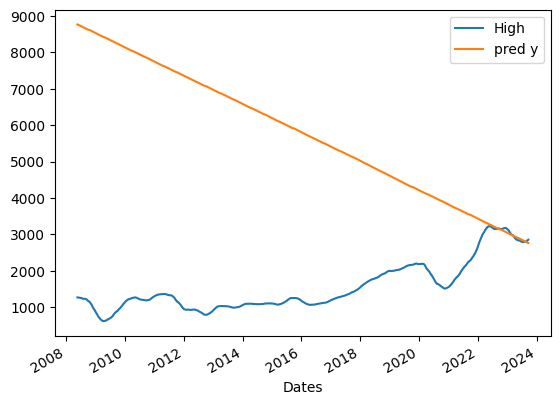

In [13]:


leumi_regression_data_high = leumi_regression_data["High"]
#leumi_regression_data = smoothing_convolve(leumi_regression_data)
leumi_regression_data_high = leumi_regression_data_high.rolling(100).mean()
leumi_regression_data_high = leumi_regression_data_high.dropna() #drops the NaN elements 
#leumi_regression_data
df = pd.DataFrame(leumi_regression_data_high)
#df.reset_index(inplace=False)

#df["High"] = leumi_regression_data 
#print(df)
date , a , b = finding_last_big_change(df)
df

In [14]:
date

Timestamp('2022-05-25 00:00:00+0300', tz='Asia/Jerusalem')

In [15]:
df

,High,numbers,Dates
Date,,,
2008-05-21 00:00:00+03:00,1272.716086,0,2008-05-21 00:00:00+03:00
2008-05-22 00:00:00+03:00,1272.411616,1,2008-05-22 00:00:00+03:00
2008-05-25 00:00:00+03:00,1271.762295,2,2008-05-25 00:00:00+03:00
2008-05-26 00:00:00+03:00,1270.672807,3,2008-05-26 00:00:00+03:00
2008-05-27 00:00:00+03:00,1269.741023,4,2008-05-27 00:00:00+03:00
...,...,...,...
2023-09-12 00:00:00+03:00,2841.746878,3777,2023-09-12 00:00:00+03:00
2023-09-13 00:00:00+03:00,2845.586625,3778,2023-09-13 00:00:00+03:00
2023-09-14 00:00:00+03:00,2849.244592,3779,2023-09-14 00:00:00+03:00


## We Can clearly see that the at the 2022-04-14 its approximalety the date where the trend has changed 

In [16]:
df['2022-05-25':]

,High,numbers,Dates
Date,,,
2022-05-25 00:00:00+03:00,3227.070216,3459,2022-05-25 00:00:00+03:00
2022-05-26 00:00:00+03:00,3226.356280,3460,2022-05-26 00:00:00+03:00
2022-05-29 00:00:00+03:00,3226.076099,3461,2022-05-29 00:00:00+03:00
2022-05-30 00:00:00+03:00,3225.592273,3462,2022-05-30 00:00:00+03:00
2022-05-31 00:00:00+03:00,3224.910847,3463,2022-05-31 00:00:00+03:00
...,...,...,...
2023-09-12 00:00:00+03:00,2841.746878,3777,2023-09-12 00:00:00+03:00
2023-09-13 00:00:00+03:00,2845.586625,3778,2023-09-13 00:00:00+03:00
2023-09-14 00:00:00+03:00,2849.244592,3779,2023-09-14 00:00:00+03:00


<Axes: xlabel='Date'>

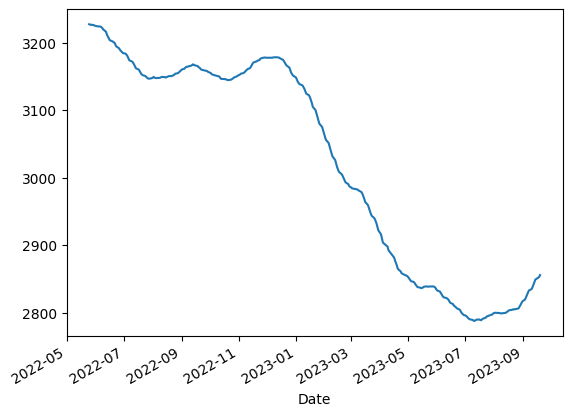

In [17]:
df['2022-05-25':]["High"].plot()

<Axes: xlabel='Date'>

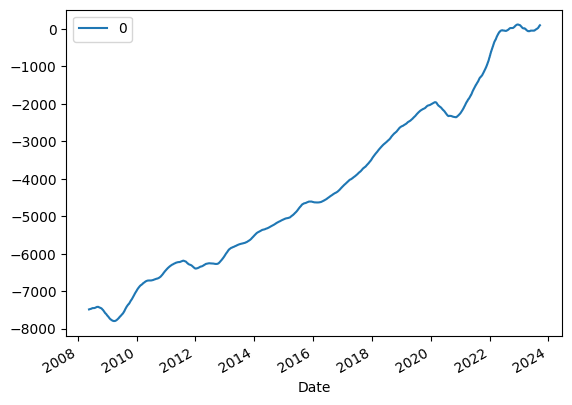

In [18]:
df_normalized = change_alignment(df["High"] , a , b)
df_normalized.plot()

In [19]:
df_normalized['2022-05-25':]

,0
Date,
2022-05-25 00:00:00+03:00,-49.028277
2022-05-26 00:00:00+03:00,-48.156228
2022-05-29 00:00:00+03:00,-46.850424
2022-05-30 00:00:00+03:00,-45.748264
2022-05-31 00:00:00+03:00,-44.843705
...,...
2023-09-12 00:00:00+03:00,69.991686
2023-09-13 00:00:00+03:00,75.417418
2023-09-14 00:00:00+03:00,80.661370


<Axes: xlabel='Date'>

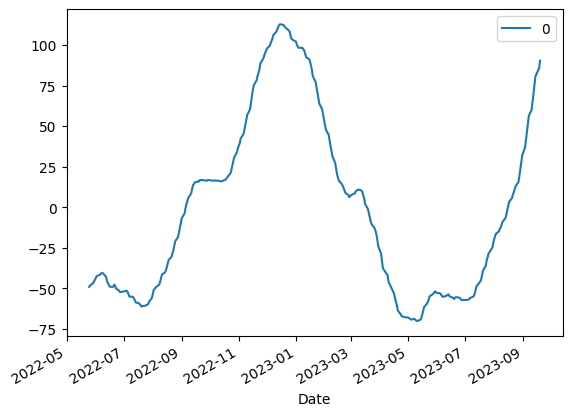

In [20]:
df_normalized['2022-05-25':].plot()

In [21]:
leumi_regression_data_normalized = change_alignment(leumi_regression_data["High"] , a ,b)

<Axes: xlabel='Date'>

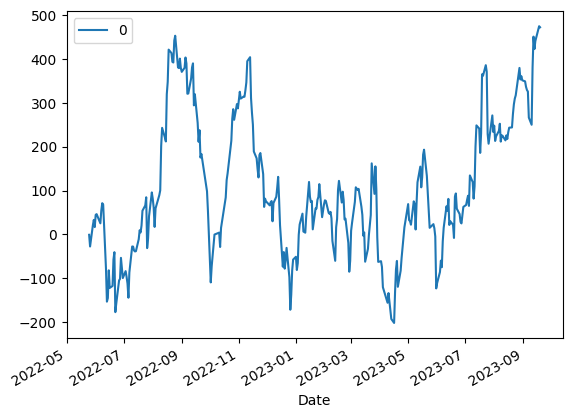

In [22]:
leumi_regression_data_normalized['2022-05-25':].plot()

In [23]:
leumi_regression_data_normalized

,0
Date,
2007-12-31 00:00:00+02:00,-7435.249684
2008-01-01 00:00:00+02:00,-7423.778120
2008-01-02 00:00:00+02:00,-7396.066130
2008-01-03 00:00:00+02:00,-7405.777939
2008-01-06 00:00:00+02:00,-7442.321308
...,...
2023-09-12 00:00:00+03:00,451.257345
2023-09-13 00:00:00+03:00,422.843330
2023-09-14 00:00:00+03:00,441.429315


In [24]:
a # We are dropping 1.5 points each day !! Maybe Choose buy below -100 sell above 100 ?? 

-1.5859852228413804

# Generalizing our ideas  

In [25]:
import yfinance as yf

# Download 15 years of historical stocks using the daily time frame
leumi = yf.download("LUMI.TA", period="15y", interval="1d")
discount = yf.download("DSCT.TA", period="15y", interval="1d")
bezeq = yf.download("BEZQ.TA", period="15y", interval="1d")
cellcom = yf.download("CEL.TA", period="15y", interval="1d")
elbit = yf.download("ESLT.TA", period="15y", interval="1d")
nice = yf.download("NICE.TA", period="15y", interval="1d")
teva = yf.download("TEVA.TA", period="15y", interval="1d")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Date
2008-09-21     563.819580
2008-09-22     528.580811
2008-09-23     520.526306
2008-09-24     533.614929
2008-09-25     528.580811
                 ...     
2023-09-13    1968.000000
2023-09-14    1976.000000
2023-09-18    1981.000000
2023-09-19    1987.000000
2023-09-20    1985.000000
Name: High, Length: 3698, dtype: float64
1694.7314285714285
1694.5009216589863
1694.2843750000002
1694.0904761904765
1693.938655462185
1693.8416326530612
1693.800396825397
1693.8119691119691
1693.8695488721803
1693.9835164835165
1694.143928571429
1694.3484320557493
1694.6261904761905
1694.9900332225916
1695.4139610389611
1695.8720634920635
1696.3341614906835
1696.7954407294835
1697.2473214285712
1697.6807580174927
1698.0862857142856
1698.4582633053224
1698.7848901098903
1699.0943396226414
1699.3899470899473
1699.6649350649354
1699.926275510204
1700.180701754386
1700.4307881773398
1700.6777239709443
1700.914761904762
1701.1391100702576
1701.3417050691246
1701.5303854875285
1701.7154017857144
1701.9054

<Axes: xlabel='Date'>

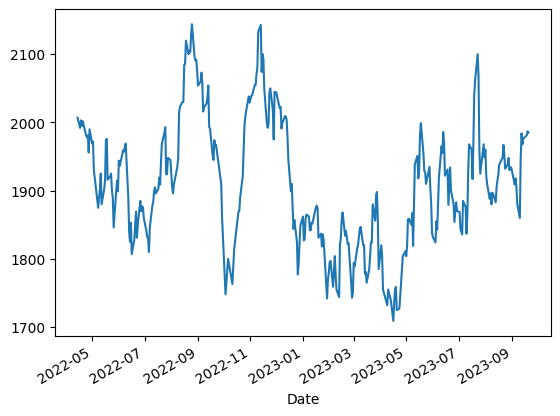

In [26]:



date , a ,b = analyse_last_big_change_auto(discount , "High")
discount['2022-04-14':]["High"].plot()


<Axes: xlabel='Date'>

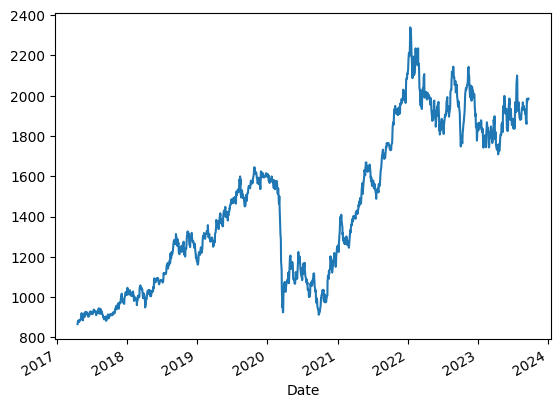

In [27]:
discount["High"]['2017-04-14':].plot()

Date
2008-09-21     563.819580
2008-09-22     528.580811
2008-09-23     520.526306
2008-09-24     533.614929
2008-09-25     528.580811
                 ...     
2023-09-13    1968.000000
2023-09-14    1976.000000
2023-09-18    1981.000000
2023-09-19    1987.000000
2023-09-20    1985.000000
Name: High, Length: 3698, dtype: float64


<Axes: xlabel='Date'>

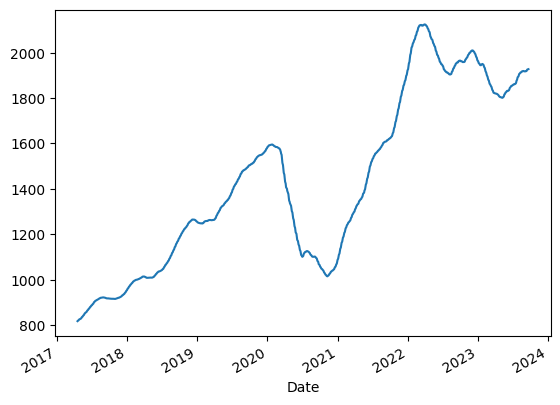

In [28]:
df_smooth_discount = smooth_plot(discount , "High")
df_smooth_discount['2017-04-14':].plot()

## So discount is not great , BUT we can take the best fit regressionnnnn more on this later !! 

# Working Samples ! 

Date
2008-09-21    10470.0
2008-09-22    10340.0
2008-09-23    10100.0
2008-09-24    10170.0
2008-09-25    10250.0
               ...   
2023-09-13     1230.0
2023-09-14     1195.0
2023-09-18     1170.0
2023-09-19     1173.0
2023-09-20     1215.0
Name: High, Length: 3699, dtype: float64
2260.5047619047623
2259.2705069124427
2258.091071428571
2256.946753246753
2255.8197478991597
2254.70693877551
2253.620238095238
2252.596138996139
2251.6150375939847
2250.664102564103
2249.7332142857144
2248.8139372822297
2247.921768707483
2247.0601328903654
2246.2350649350647
2245.4425396825395
2244.682298136646
2243.9449848024315
2243.227083333333
2242.509329446064
2241.7619999999997
2240.9854341736695
2240.1629120879124
2239.3291105121293
2238.4955026455027
2237.661038961039
2236.824744897959
2235.9989974937344
2235.1721674876844
2234.3518159806295
2233.5178571428573
2232.6683840749415
2231.794930875576
2230.897505668934
2229.9839285714284
2229.0756043956044
2228.1733766233765
2227.278251599147
2226.3

<Axes: xlabel='Date'>

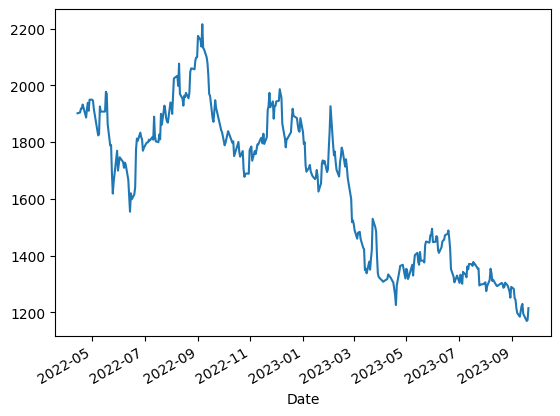

In [29]:
date , a ,b = analyse_last_big_change_auto(cellcom , "High")
cellcom['2022-04-14':]["High"].plot()

<Axes: xlabel='Date'>

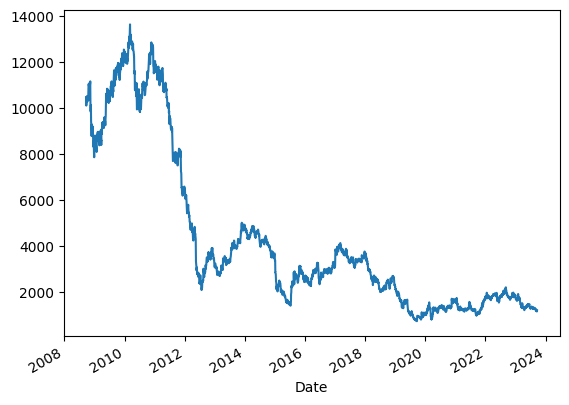

In [30]:
cellcom["{}-{}-{}".format(date.year,date.month,date.day):]["High"].plot()

In [31]:

# Download 15 years of historical stocks using the daily time frame
leumi = yf.download("LUMI.TA", period="15y", interval="1d")
discount = yf.download("DSCT.TA", period="15y", interval="1d")
bezeq = yf.download("BEZQ.TA", period="15y", interval="1d")
cellcom = yf.download("CEL.TA", period="15y", interval="1d")
elbit = yf.download("ESLT.TA", period="15y", interval="1d")
nice = yf.download("NICE.TA", period="15y", interval="1d")
teva = yf.download("TEVA.TA", period="15y", interval="1d")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [32]:
leumi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-09-21,1209.0,1310.0,1169.0,1275.0,960.641785,17848253
2008-09-22,1267.0,1272.0,1193.0,1212.0,913.174561,10320412
2008-09-23,1190.0,1221.0,1140.0,1200.0,904.133240,12419574
2008-09-24,1237.0,1261.0,1197.0,1206.0,908.653992,8547687
2008-09-25,1200.0,1265.0,1196.0,1260.0,949.339905,14890180
...,...,...,...,...,...,...
2023-09-13,3035.0,3036.0,2986.0,2986.0,2986.000000,1934308
2023-09-14,3005.0,3053.0,2994.0,3050.0,3050.000000,3917780
2023-09-18,3022.0,3085.0,3022.0,3063.0,3063.000000,2037686


<Axes: xlabel='Date'>

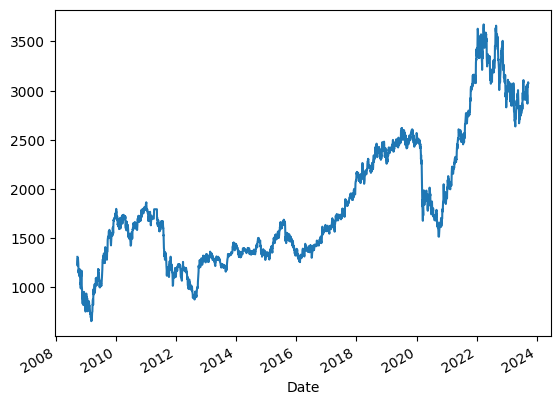

In [33]:
leumi["High"].plot()

<Axes: xlabel='Date'>

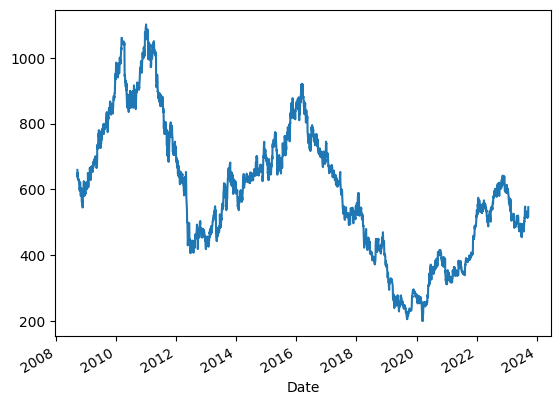

In [34]:
bezeq["High"].plot()

<Axes: xlabel='Date'>

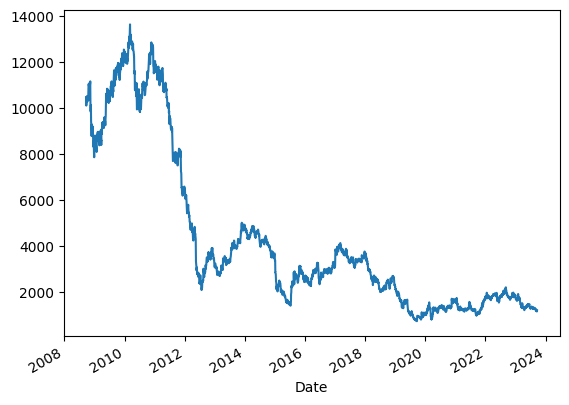

In [35]:
cellcom["High"].plot()

<Axes: xlabel='Date'>

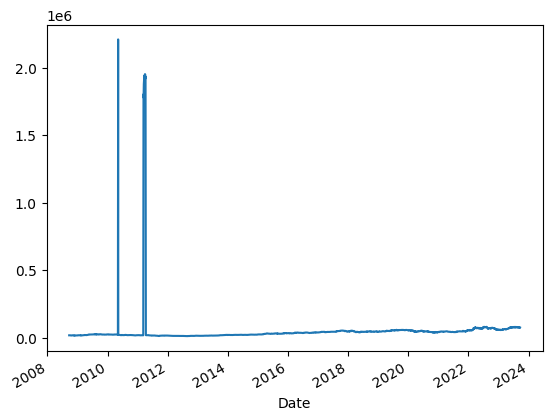

In [36]:
elbit["High"].plot()

<Axes: xlabel='Date'>

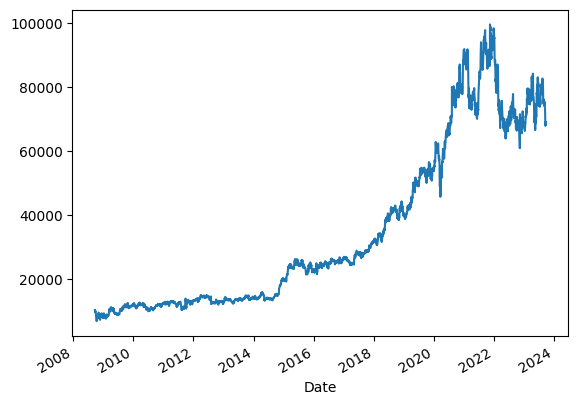

In [37]:
nice["High"].plot()

<Axes: xlabel='Date'>

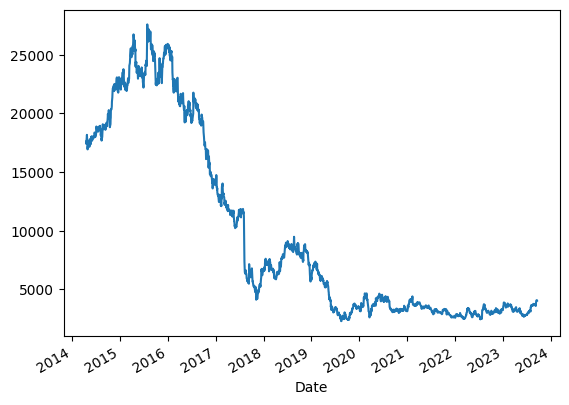

In [38]:
teva["High"]['2014-04-14':].plot()

<Axes: xlabel='Date'>

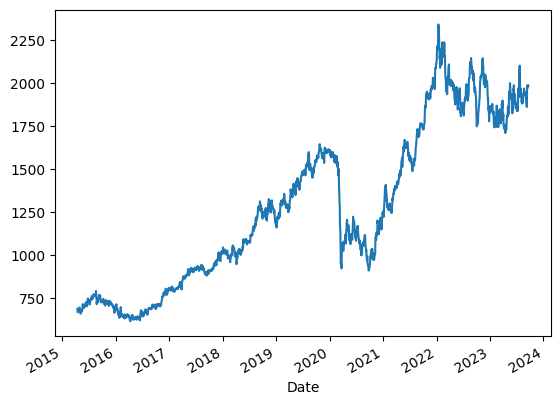

In [39]:
discount["High"]['2015-04-14':].plot()

In [40]:
["High"].plot()

AttributeError: 'list' object has no attribute 'plot'

In [ ]:
["High"].plot()

In [ ]:
["High"].plot()